> # Лабораторная работа №1 #
>> ## Вариант 2 ##
>>> ### Отмена рейсов ###
>>>>> #### Выполнил студент группы 16-В-1 Гавшин Константин ####

In [4]:
import pandas as pd
import numpy
from scipy import stats
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10,5
flight = pd.read_csv("flights.csv", nrows=500000)
# Больше не грузит :(
flight

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### 1. Подсчитайте количество отменённых рейсов###

In [2]:
print(flight.groupby('CANCELLED')['FLIGHT_NUMBER'].count())

CANCELLED
0    483176
1     16824
Name: FLIGHT_NUMBER, dtype: int64


#### Количество тмененных рейсов = 16824 ####

### 2. Определите аэропорт, рейсы для которого отменяются наиболее часто###

##### Найдем индекс аэропорта с наибольшим количеством отмененных рейсов #####

In [3]:
flight['CANCELLED'].idxmax()

32

##### По индексу определим название аэропорта #####

In [4]:
flight.loc[[32],'ORIGIN_AIRPORT']

32    ANC
Name: ORIGIN_AIRPORT, dtype: object

##### ANC = Ted Stevens Anchorage International Airport - аэропорт, рейсы которого отменяются чаще всего #####

### 3. Определите коэффициент корреляции Пирсона и Спирмена между отменой рейса и днём недели, месяцем, авиакомпанией, аэропортом. Оцените значение p-value. Постройте плотность распределения признаков###

##### Отмена рейса - день недели #####

In [5]:
flight['CANCELLED'].corr(flight['DAY'])

-0.038815592965758865

In [6]:
stats.spearmanr(flight['CANCELLED'],flight['DAY'])

SpearmanrResult(correlation=-0.043267542936422446, pvalue=9.2814652601887258e-206)

Если предположить, что отмена рейсов и день недели никак не связаны, то вероятность получить такие или еще более выраженные различия составила pvalue = 9.2814652601887258e-206

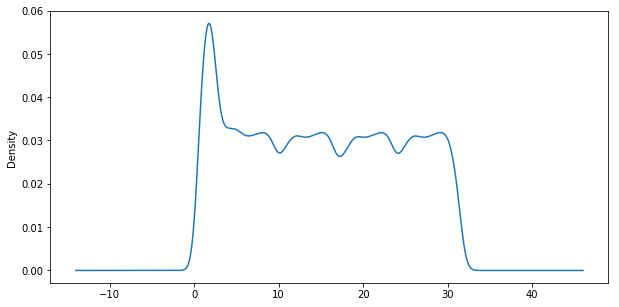

In [69]:
s = pd.Series(flight['DAY'])
s.plot.kde()

##### Отмена рейса - месяц #####

In [10]:
flight['CANCELLED'].corr(flight['MONTH'])

0.17885181785805246

In [45]:
stats.spearmanr(flight['CANCELLED'],flight['MONTH'])

SpearmanrResult(correlation=0.17885181785805146, pvalue=0.0)

Если предположить, что отмена рейсов и месяц никак не связаны, то вероятность получить такие или еще более выраженные различия составила pvalue = 0.0

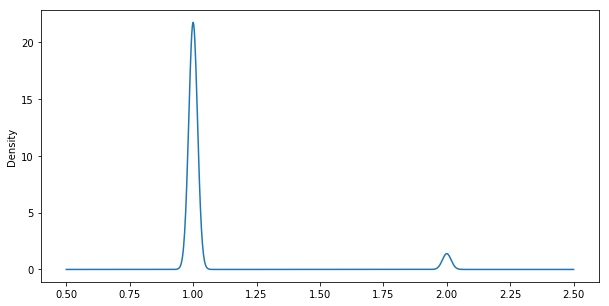

In [74]:
s = pd.Series(flight['MONTH'])
s.plot.kde()

>>>> #### Не грузит :( ####

##### Отмена рейса - авиакомпания #####

In [5]:
flight['CANCELLED'].corr(flight['AIRLINE'])

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
stats.spearmanr(flight['CANCELLED'],flight['AIRLINE'])

In [ ]:
s = pd.Series(flight['AIRLINE'])
s.plot.kde()

##### Отмена рейса - аэропорт #####

In [ ]:
flight['CANCELLED'].corr(flight['ORIGIN_AIRPORT'])

In [ ]:
stats.spearmanr(flight['CANCELLED'],flight['ORIGIN_AIRPORT'])

In [ ]:
s = pd.Series(flight['ORIGIN_AIRPORT'])
s.plot.kde()

### 4. Подсчитайте для трёх выбранных авиакомпаний: количество рейсов, количество отменённых рейсов, количество перенаправленных рейсов###

### Для AS = American Airlines Inc. ###

##### Количество рейсов = 45626 ####

In [41]:
flight[(flight.AIRLINE == 'AS')&
         (flight.CANCELLED == 0)].shape

(14066, 32)

##### Количество отмененных рейсов = 1324 ####

In [42]:
flight[(flight.AIRLINE == 'AS')&
         (flight.CANCELLED == 1)].shape

(83, 32)

##### Количество перенаправленных рейсов = 1124 ####

In [43]:
flight[(flight.DIVERTED == 1)].shape

(1124, 32)

### Для AA = Alaska Airlines Inc. ###

##### Количество рейсов = 14066 ####

In [44]:
flight[(flight.AIRLINE == 'AA')&
         (flight.CANCELLED == 0)].shape

(45626, 32)

##### Количество отмененных рейсов = 83 ####

In [45]:
flight[(flight.AIRLINE == 'AA')&
         (flight.CANCELLED == 1)].shape

(1324, 32)

##### Количество перенаправленных рейсов = 46####

In [46]:
flight[(flight.AIRLINE == 'AA')&
         (flight.DIVERTED == 1)].shape

(110, 32)

### Для US = US Airways Inc. ###

##### Количество рейсов = 34323 ####

In [15]:
flight[(flight.AIRLINE == 'US')&
           (flight.CANCELLED == 0)].shape

(34323, 31)

##### Количество отмененных рейсов = 1268 ####

In [16]:
flight[(flight.AIRLINE == 'US')&
           (flight.CANCELLED == 1)].shape

(1268, 31)

##### Количество перенаправленных рейсов = 73 ####

In [21]:
flight[(flight.AIRLINE == 'US')&
         (flight.DIVERTED == 1)].shape

(73, 31)

### 5. Определите скорость полёта для каждого рейса, скорость полёта среднюю для трёх выбранных авиакомпаний ###

In [22]:
flight['SPEED_FLY'] = flight['DISTANCE']/(flight['AIR_TIME']/60)
flight

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,SPEED_FLY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,514.082840
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,531.558935
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,517.894737
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,544.651163
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,436.582915
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,462.815534
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,506.103896
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,559.210526
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,507.745665
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,563.548387


#### Для 'AS' Airline ####

In [47]:
flight.groupby(flight.AIRLINE  =='AS')['SPEED_FLY'].mean()

AIRLINE
False    402.033744
True     431.491931
Name: SPEED_FLY, dtype: float64

#### Для 'AA' Airline ####

In [48]:
flight.groupby(flight.AIRLINE  =='AA')['SPEED_FLY'].mean()

AIRLINE
False    399.992722
True     430.682638
Name: SPEED_FLY, dtype: float64

#### Для 'US' Airline ####

In [24]:
flight.groupby(flight.AIRLINE  =='US')['SPEED_FLY'].mean()

AIRLINE
False    402.563175
True     407.170196
Name: SPEED_FLY, dtype: float64

### 6. Визуализируйте тепловую карту частоты отмены рейсов. По одной оси – дни, по другой оси – рейс (для двух аэропортов)###

#### Для ANC = Ted Stevens Anchorage International Airport ####

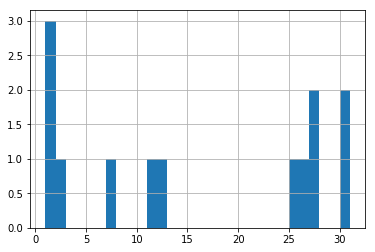

In [3]:
flight[(flight.ORIGIN_AIRPORT == 'ANC')&
         (flight.CANCELLED == 1)].shape
cancelled_flight = flight[['DAY']+['CANCELLED']+['ORIGIN_AIRPORT']]
s = cancelled_flight[(flight['ORIGIN_AIRPORT'] == 'ANC') & (flight['CANCELLED'] == 1)]
s.DAY.hist(bins=30)

#### Для LAX = Los Angeles International Airport ####

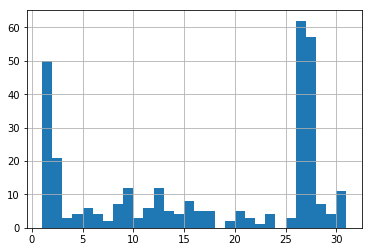

In [4]:
flight[(flight.ORIGIN_AIRPORT == 'LAX')&
         (flight.CANCELLED == 1)].shape
s = cancelled_flight[(flight['ORIGIN_AIRPORT'] == 'LAX') & (flight['CANCELLED'] == 1)]
s.DAY.hist(bins=30)

### 7. Посчитайте и визуализируйте время задержки отправки и прибытия по трём аэропортам###

#### Время задержки отправки рейсов ####

#### Для ANC = Ted Stevens Anchorage International Airport ####

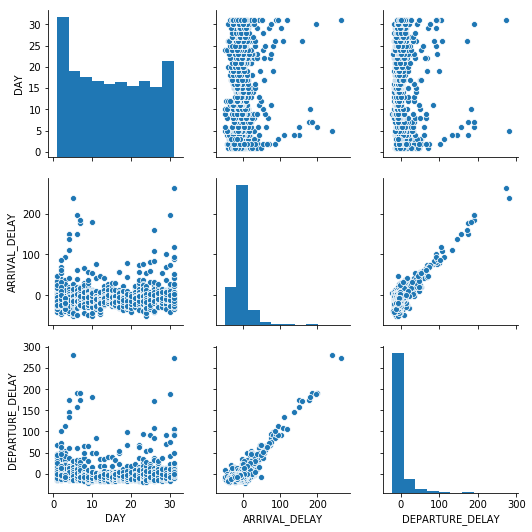

In [52]:
delay_flight = flight[['ARRIVAL_DELAY']+['DEPARTURE_DELAY']+['ORIGIN_AIRPORT']+['DAY']]
s = delay_flight[(flight['ORIGIN_AIRPORT'] == 'ANC')]
s = s.dropna()
cols = ['DAY','ARRIVAL_DELAY','DEPARTURE_DELAY']
sns_plot = sns.pairplot(s[cols])

#### Для LAX = Los Angeles International Airport ####

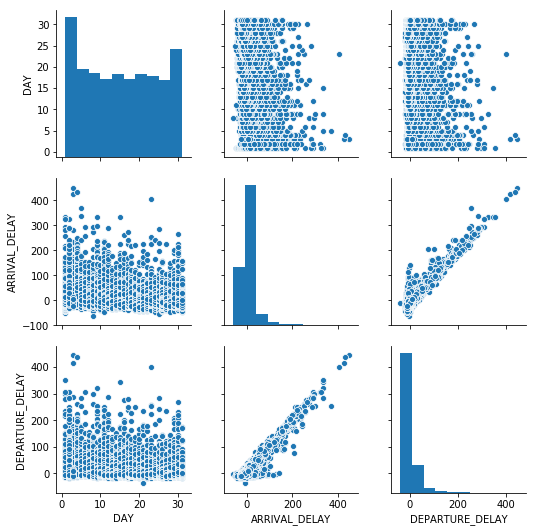

In [50]:
s = delay_flight[(flight['ORIGIN_AIRPORT'] == 'LAX')]
s = s.dropna()
cols = ['DAY','ARRIVAL_DELAY','DEPARTURE_DELAY']
sns_plot = sns.pairplot(s[cols])

#### Для SFO = San Francisco International Airport ####

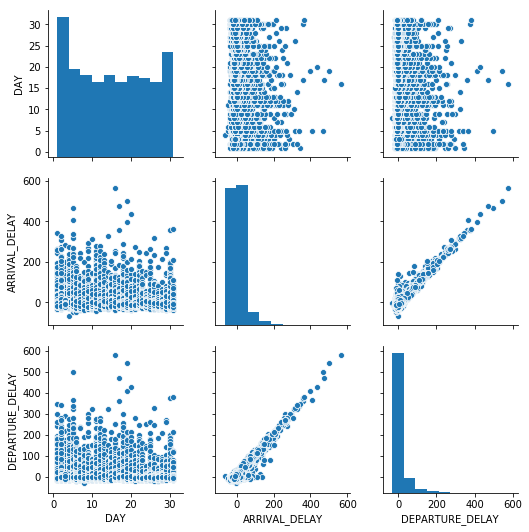

In [53]:
s = delay_flight[(flight['ORIGIN_AIRPORT'] == 'SFO')]
s = s.dropna()
cols = ['DAY','ARRIVAL_DELAY','DEPARTURE_DELAY']
sns_plot = sns.pairplot(s[cols])

### 8. Определите для трёх выбранных аэропортов и визуализируйте задержки по каждой причине ###

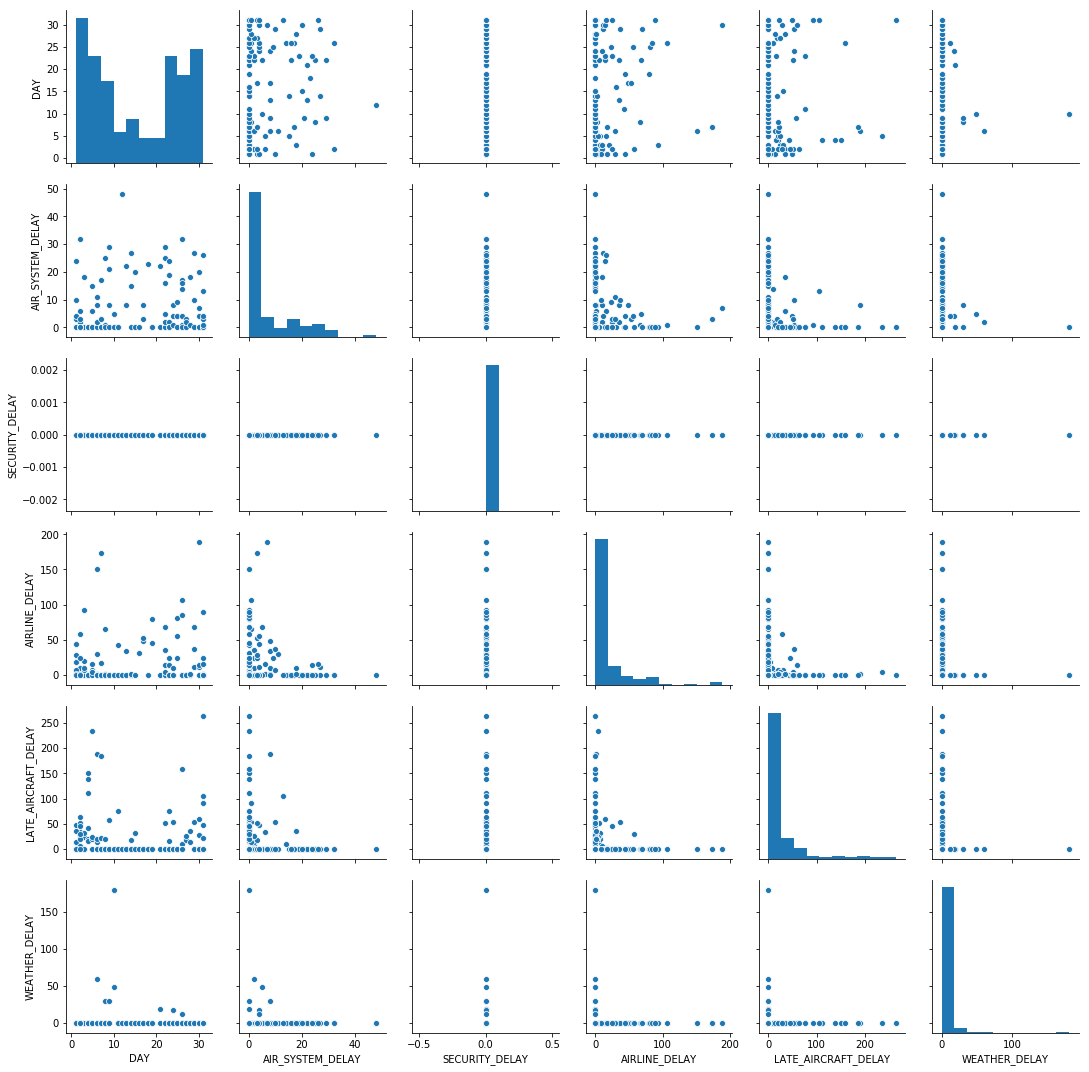

In [59]:
_delay_flight = flight[['DAY']+['AIR_SYSTEM_DELAY']+['SECURITY_DELAY']+['ORIGIN_AIRPORT']+['AIRLINE_DELAY']+['LATE_AIRCRAFT_DELAY']+['WEATHER_DELAY']]
s = _delay_flight[(flight['ORIGIN_AIRPORT'] == 'ANC')]
s= s.dropna()
cols = ['DAY','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']
sns_plot = sns.pairplot(s[cols])

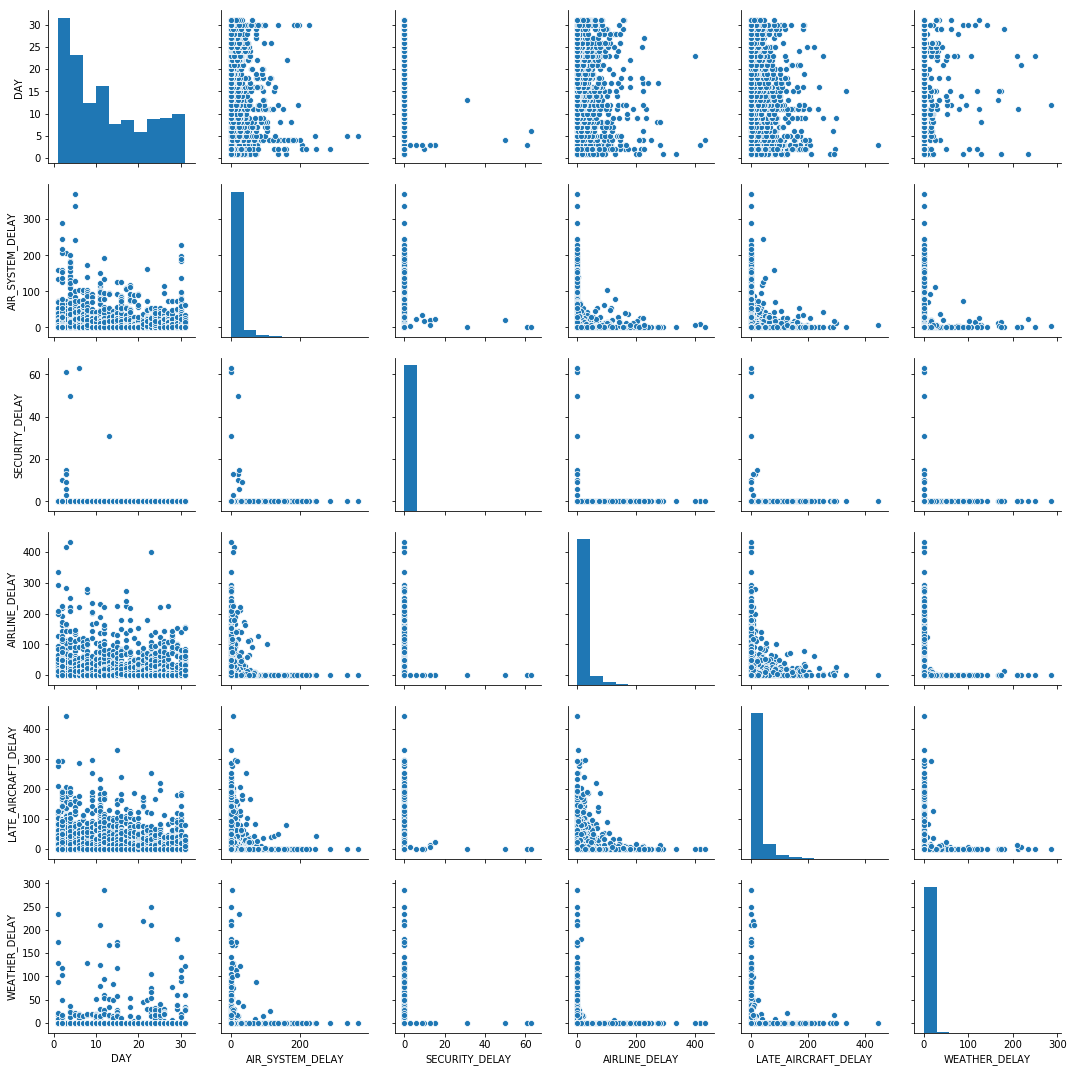

In [63]:
s = _delay_flight[(flight['ORIGIN_AIRPORT'] == 'LAX')]
s = s.dropna()
sns_plot = sns.pairplot(s[cols])

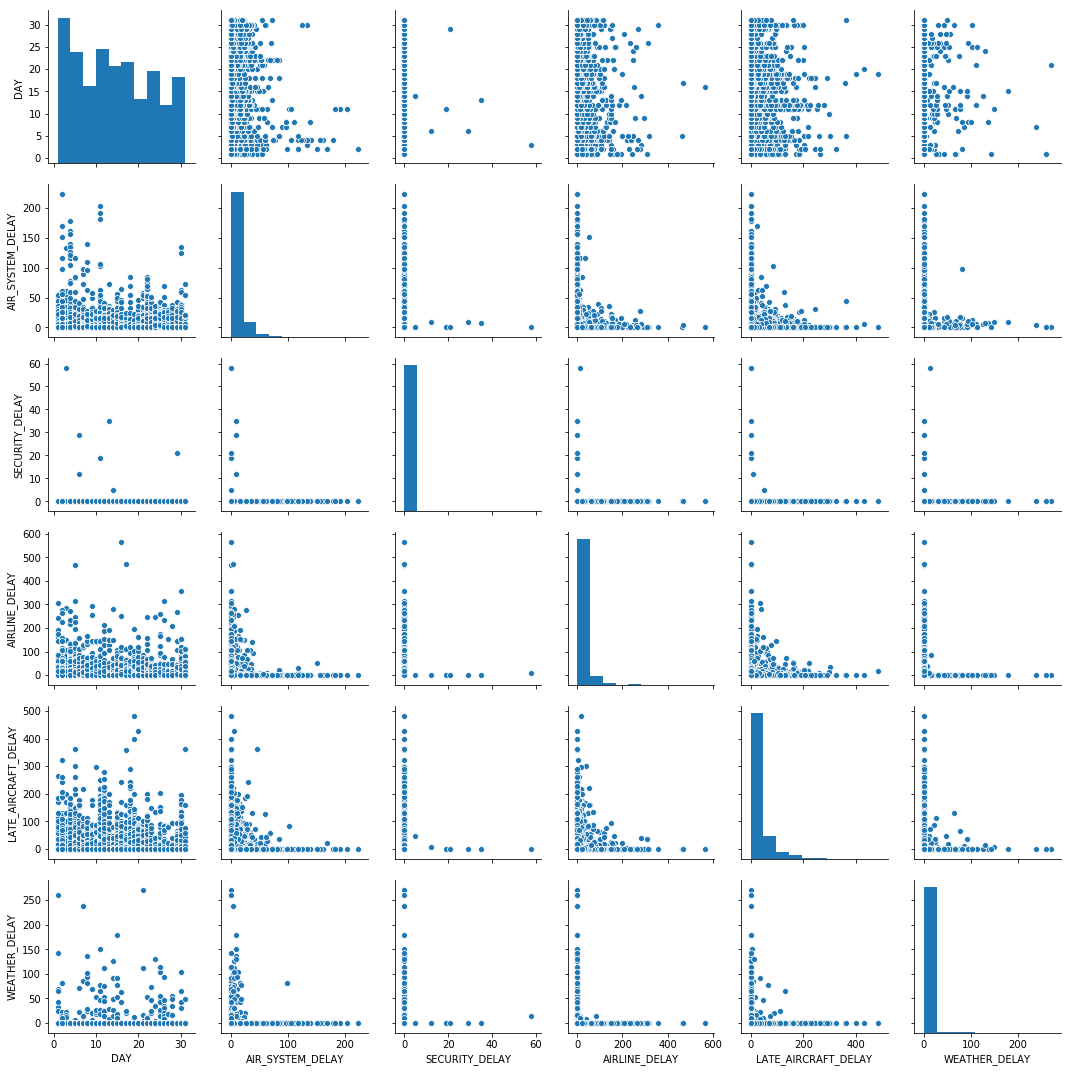

In [64]:
s = _delay_flight[(flight['ORIGIN_AIRPORT'] == 'SFO')]
s = s.dropna()
sns_plot = sns.pairplot(s[cols])

### 9. Определите авиакомпанию с максимальными задержками рейсов по отправке и прибытию ###

#### Найдем индекс авиакомпании с максимальными задержками рейсов по отправке и прибытию ####

In [2]:
flight['SUM_DELAY'] = flight['ARRIVAL_DELAY'] + flight['DEPARTURE_DELAY']
flight['SUM_DELAY'].idxmax()

337720

#### Авиакомпания с максимальными задержками рейсов по отправке и прибытию - AA = American Airlines Inc. ####

In [4]:
flight.loc[[337720],'AIRLINE']

337720    AA
Name: AIRLINE, dtype: object